
# Regression model
# Relative location of CT slices on axial axis

 The data are available at:

 https://archive.ics.uci.edu/dataset/206/relative+location+of+ct+slices+on+axial+axis

The dataset consists of 384 features extracted from CT images. The class variable is numeric and denotes the relative location of the CT slice on the axial axis of the human body.

The data was retrieved from a set of 53500 CT images from 74 different patients (43 male, 31 female).

To exstract the data use the panda routines


In [1]:
import zipfile
import pandas as pd
 
# read the dataset using the compression zip
df = pd.read_csv('https://archive.ics.uci.edu/static/public/206/relative+location+of+ct+slices+on+axial+axis.zip',compression='zip')
 
# display dataset
print(df.head())

   patientId  value0  value1  value2  value3  value4  value5  value6  value7  \
0          0     0.0     0.0     0.0     0.0     0.0     0.0   -0.25   -0.25   
1          0     0.0     0.0     0.0     0.0     0.0     0.0   -0.25   -0.25   
2          0     0.0     0.0     0.0     0.0     0.0     0.0   -0.25   -0.25   
3          0     0.0     0.0     0.0     0.0     0.0     0.0   -0.25   -0.25   
4          0     0.0     0.0     0.0     0.0     0.0     0.0   -0.25   -0.25   

   value8  ...  value375  value376  value377  value378  value379  value380  \
0   -0.25  ...     -0.25  0.980381       0.0       0.0       0.0       0.0   
1   -0.25  ...     -0.25  0.977008       0.0       0.0       0.0       0.0   
2   -0.25  ...     -0.25  0.977008       0.0       0.0       0.0       0.0   
3   -0.25  ...     -0.25  0.977008       0.0       0.0       0.0       0.0   
4   -0.25  ...     -0.25  0.976833       0.0       0.0       0.0       0.0   

   value381  value382  value383  reference  
0    

We transform the data to a matrix of shape 53500 x 386

In [33]:
Aall=df.to_numpy()
print(Aall.shape)

(53500, 386)


We add a column of all 1 and we organize the input data by dividing in test set and training set

In [34]:
from sklearn.model_selection import train_test_split
import numpy as np
#Add a column of ones at the beginning of the data matrix
Aall = np.column_stack([np.ones(Aall.shape[0]), Aall])
X = Aall
X=np.delete(X,386,1)
y = Aall[:,386]
print(X[:,0])

[1. 1. 1. ... 1. 1. 1.]


In [35]:
import numpy as np
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size = .9,
    test_size = .1,
    random_state = 5,
    shuffle = True
)


In [84]:
print(X_train.shape)
print(X_test.shape)
rank=np.linalg.matrix_rank(X_train)

(48150, 386)
(5350, 386)


Use the prepared data to solve the regression model with all the studied techniques.
Can we use the normal equation and the QR factorization? If the answer is positive compare the condition numbers of the QR methods and the normal equations. What are the results?


Use the funcation scipy.linalg.lstsq and check if all the lapack drivers works.
Compare the results changing the initial value cond. The results are the same? What about the execution time?

Analyze the singular values and check if it is possible to use a principal component regression procedure. Compute the solution using the singular value decomposition. 
Can you observe a relation in the chosen singular value and the value of cond of the routine lstsq?

Perform the same analysis by preprocessing the data in order to have data from a normal distribution with mean zero  and compute the singular value decomposition on this matrix.

Check the performance of the method by computing the least square residual for the training set and the testset. The minimum and the maximum values of the predicted error for both, the training set and the testset.

Compute the multiple R-squared: R2_train = 1 - sum( (y - yest)**2)/sum( (y-mean(y))**2 where y are the value to predict and yest are the estimated values for the training set.
Compute the value R2_test for the testset.

A value of R2 near one means that the constructed model is good.

Change the size of the training set and the testing set to 0.7% and 0.3% and repeat the previous steps.

Comment the obtained results.


<h1> Normal Equation </h1>
Normal equation is a method to solve the linear regression problem. It is based on the following formula: 

$$\theta = (X^T X)^{-1} X^T y$$

where $\theta$ is the vector of parameters, $X$ is the matrix of input data, and $y$ is the vector of output data. It is important to note that the matrix $X$ must be full rank, otherwise the inverse of $X^T X$ does not exist, so the normal equation cannot be used.


Since the matrix $X$ is not full rank, we cannot use the normal equation to solve the problem. The rank of the matrix $X^T X$ is 375, which is lower than p=min(n,m)=386. The condition number of the matrix $X^T X$ is very high, which means that the matrix is ill-conditioned. The condition number of a matrix is computer as follows: 

$$
\|A\|_2 \cdot \|A^{-1}\|_2
$$



In [ ]:
print("Rank of train data: ",np.linalg.matrix_rank(X_train.T@X_train))
print("Shape of train data: ",(X_train.T @ X_train).shape)

Rank of train data:  375
Shape of train data:  (386, 386)
Residuals:  5.583855310705728e+19
Condition number of normal equation matrix:  1.8704153273192688e+22


<h1>QR factorization</h1>
The QR factorization is a method to solve the linear regression problem. It is based on the following formula:

$$
X = QR
$$

where $X$ is the matrix of input data, $Q$ is an orthogonal matrix, and $R$ is an upper triangular matrix. The solution of the linear regression problem is given by:

$$
\theta = R^{-1} Q^T y
$$

Since $X$ is not full rank, we cannot use the QR factorization to solve the problem. We need to use the Pivot QR factorization, which is based on the following formula:

$$
X P = QR
$$

where $P$ is a permutation matrix. The solution of the linear regression problem is given by:

$$
\theta = R^{-1} Q^T P^T y
$$


If we try to compute a solution we can notice that the residual is much lower than the one obtained with the normal equation while the condition number is much higher than the one obtained with the normal equation. Since X_train is singular, the matrix R can have some element near zero, which can lead to numerical instability

In [149]:
import scipy.linalg as la
Q,R,P = la.qr(X_train, pivoting=True, mode='economic') #economic -> Q is m x k, R is k x n where k=min(m,n)
print("Condition number of QR factorization matrix: ",np.linalg.cond(R,2))
#truncate R and Q to rank
R_trunc = R[:rank, :rank]
Q_trunc = Q[:, :rank]
QTb = Q_trunc.T @ y_train
theta_permuted=np.zeros(X_train.shape[1])
theta_permuted [:rank]= la.solve_triangular(R_trunc, QTb) #store the solution in the first rank columns
#restore original order
theta = np.zeros_like(theta_permuted)
theta[P] = theta_permuted #permute the elements of theta_permuted to get the solution

y_train_pred = X_train @ theta
residuals_train = y_train - y_train_pred
print("Residuals for train set: ",np.linalg.norm(residuals_train,2))
print("Maximum error for train set: ",np.max(np.abs(residuals_train)))
print("Minimum error for train set: ",np.min(np.abs(residuals_train)))
R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
print("R2 for train set: ",R2_train)

y_test_pred = X_test @ theta
residuals_test = y_test - y_test_pred
print("Residuals for test set: ",np.linalg.norm(residuals_test,2))
print("Maximum error for test set: ",np.max(np.abs(residuals_test)))
print("Minimum error for test set: ",np.min(np.abs(residuals_test)))
R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
print("R2 for test set: ",R2_test)


#THIS model is quite good

Condition number of QR factorization matrix:  2.4463550697566203e+32
Residuals for train set:  1798.3737270942406
Maximum error for train set:  49.47129163028276
Minimum error for train set:  1.4352963262354024e-12
R2 for train set:  0.8653831545119198
Residuals for test set:  613.1967475658972
Maximum error for test set:  46.98621458423358
Minimum error for test set:  0.0023313738117138882
R2 for test set:  0.8603214800189586


<h1> SVD: Singular Value Decomposition </h1>

The Singular Value Decomposition (SVD) can also be used to solve the linear regression problem. It is based on the following formula:

$$
X = U \Sigma V^T
$$

where $X$ is the matrix of input data, $U$ is an orthogonal matrix, $Sigma$ is a rectangular, and $V$ is an orthogonal matrix. The solution of the linear regression problem is given by:

$$
theta = V_r D^{-1} U_r^T y
$$

where $V_r$ is the matrix containing the first r columns of $V$, $U_r$ is the matrix containing the first r columns of $U$, and $D$ is the diagonal matrix containing the first r singular values, which are the non-zeros one


In [ ]:
U, S, Vt = np.linalg.svd(X_train, full_matrices=False)
print("Rank of X_train: ",rank)
print("Number of non zero singular values: ",np.count_nonzero(S))
#S contains all singular values. If we consider only the non zero singular values, they should be equal to the rank of X_train. In this case this is not true, probably due to numerical errors.
# I will use later the PCR and Euckardt-Young theorem to remove noise


# So let's consider the first r=rank(X_train) singular values
U_r = U[:, :rank]
Vt_r = Vt[:rank, :]
S_r = np.diag(S)[:rank, :rank]
S_r_inv = np.linalg.inv(S_r)
theta = Vt_r.T @ S_r_inv @ U_r.T @ y_train
y_train_pred = X_train @ theta
residuals_train = y_train - y_train_pred
print("Residuals for train set: ",np.linalg.norm(residuals_train,2))
print("Maximum error for train set: ",np.max(np.abs(residuals_train)))
print("Minimum error for train set: ",np.min(np.abs(residuals_train)))
R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
print("R2 for train set: ",R2_train)

y_test_pred = X_test @ theta
residuals_test = y_test - y_test_pred
print("Residuals for test set: ",np.linalg.norm(residuals_test,2))
print("Maximum error for test set: ",np.max(np.abs(residuals_test)))
print("Minimum error for test set: ",np.min(np.abs(residuals_test)))
R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
print("R2 for test set: ",R2_test)


Rank of X_train:  375
Number of non zero singular values:  386
Residuals for train set:  1798.3737270942406
Maximum error for train set:  49.47129163028183
Minimum error for train set:  5.613287612504791e-13
R2 for train set:  0.8653831545119198
Residuals for test set:  613.1967475658979
Maximum error for test set:  46.98621458423264
Minimum error for test set:  0.0023313738110175564
R2 for test set:  0.8603214800189583


<h1>Scipy.linalg.lstsq</h1>
The function scipy.linalg.lstsq is a method to solve the least squares problem. It uses different LAPACK drivers to solve the problem. The available drivers are:

1. **`gelsd`**:
   - **Description**: The `gelsd` driver solves the **least squares problem** using **Singular Value Decomposition (SVD)** and Divide-and-Conquer method.

2. **`gelsy`**:
   - **Description**: The `gelsy` driver solves the **least squares problem** using **QR decomposition with column pivoting**.
  

3. **`gelss`**:
   - **Description**:The `gelss` driver solves the **least squares problem** using **Singular Value Decomposition (SVD)**.

**Divide and conquer** is an optimization technique used to compute the **Singular Value Decomposition (SVD)** more efficiently.

- **Concept**: Divide and conquer breaks down the SVD problem into smaller, more manageable subproblems. Instead of performing the full SVD computation at once, the algorithm recursively divides the matrix into smaller parts and computes the decomposition in stages, merging results as it progresses.



In [145]:
import time
conditions=[1e-1,1e-2,1e-4,1e-8,1e-12,1e-16]
values={}
for condition in conditions:
    #gelsd
    times=[]
    for i in range(5):
        start_time = time.time()
        theta_gelsd = la.lstsq(X_train, y_train,lapack_driver='gelsd',cond=condition)[0] #we took [0] because lstsq returns a tuple
        times.append(time.time()-start_time)
    
    values['driver']='gelsd'
    values['condition']=condition
    values['AVGtime']=np.mean(times)
    y_train_pred = X_train @ theta_gelsd
    residuals_train = y_train - y_train_pred
    values['residuals_train']=np.linalg.norm(residuals_train,2)
    values['Min error residuals_train']=np.min(np.abs(residuals_train))
    values['Max error residuals_train']=np.max(np.abs(residuals_train))
    R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
    values['R2_train']=R2_train
    y_test_pred = X_test @ theta_gelsd
    residuals_test = y_test - y_test_pred
    values['residuals_test']=np.linalg.norm(residuals_test,2)
    values['Min error residuals_test']=np.min(np.abs(residuals_test))
    values['Max error residuals_test']=np.max(np.abs(residuals_test))
    R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
    values['R2_test']=R2_test
    print(values)
    #gelss
    times=[]
    for i in range(5):
        start_time = time.time()
        theta_gelss = la.lstsq(X_train, y_train,lapack_driver='gelss',cond=condition)[0] #we took [0] because lstsq returns a tuple
        times.append(time.time()-start_time)
    values['driver']='gelss'
    values['condition']=condition
    values['AVGtime']=np.mean(times)
    y_train_pred = X_train @ theta_gelss
    residuals_train = y_train - y_train_pred
    values['residuals_train']=np.linalg.norm(residuals_train,2)
    values['Min error residuals_train']=np.min(np.abs(residuals_train))
    values['Max error residuals_train']=np.max(np.abs(residuals_train))
    R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
    values['R2_train']=R2_train
    y_test_pred = X_test @ theta_gelss
    residuals_test = y_test - y_test_pred
    values['residuals_test']=np.linalg.norm(residuals_test,2)
    values['Min error residuals_test']=np.min(np.abs(residuals_test))
    values['Max error residuals_test']=np.max(np.abs(residuals_test))
    R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
    values['R2_test']=R2_test
    print(values)
    #gelsy
    times=[]
    for i in range(5):
        start_time = time.time()
        theta_gelsy = la.lstsq(X_train, y_train,lapack_driver='gelsy',cond=condition)[0] #we took [0] because lstsq returns a tuple
        times.append(time.time()-start_time)
    values['driver']='gelsy'
    values['condition']=condition
    values['AVGtime']=np.mean(times)
    y_train_pred = X_train @ theta_gelsy
    residuals_train = y_train - y_train_pred
    values['residuals_train']=np.linalg.norm(residuals_train,2)
    values['Min error residuals_train']=np.min(np.abs(residuals_train))
    values['Max error residuals_train']=np.max(np.abs(residuals_train))
    R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
    values['R2_train']=R2_train
    y_test_pred = X_test @ theta_gelsy
    residuals_test = y_test - y_test_pred
    values['residuals_test']=np.linalg.norm(residuals_test,2)
    values['Min error residuals_test']=np.min(np.abs(residuals_test))
    values['Max error residuals_test']=np.max(np.abs(residuals_test))
    R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
    values['R2_test']=R2_test
    print(values)

{'driver': 'gelsd', 'condition': 0.1, 'AVGtime': 2.509533643722534, 'residuals_train': 7079.003325567669, 'Min error residuals_train': 0.00016317329873416497, 'Max error residuals_train': 86.12879856814983, 'R2_train': -1.085853217608597, 'residuals_test': 2361.142356336503, 'Min error residuals_test': 0.0015384355100849234, 'Max error residuals_test': 86.21332456608175, 'R2_test': -1.0709722681710114}
{'driver': 'gelss', 'condition': 0.1, 'AVGtime': 2.30238823890686, 'residuals_train': 7079.00332556767, 'Min error residuals_train': 0.00016317329874482311, 'Max error residuals_train': 86.12879856814982, 'R2_train': -1.085853217608597, 'residuals_test': 2361.142356336503, 'Min error residuals_test': 0.0015384355101133451, 'Max error residuals_test': 86.21332456608174, 'R2_test': -1.0709722681710114}
{'driver': 'gelsy', 'condition': 0.1, 'AVGtime': 3.4240085601806642, 'residuals_train': 7079.030051187763, 'Min error residuals_train': 0.001103681757442132, 'Max error residuals_train': 86.

We can notice that, decreasing the value of cond, the residual error decreases. Regarding the execution time, we can notiche that in general the gelsy driver is slower than the other two. The execution time tends to increase with the decrease of the value of cond

<h1> PCR: Principal Component Regression </h1>

PCR can be used to solve the linear regression problem. It is based on the following formula:

$$
X_k = U_k \Sigma_k V_k^T
$$

where $X_k$ is an approximation of the matrix of input data, $U_k$ contains the first k columns of $U$, $\Sigma_k$ contains the first k singular values, and $V_k$ contains the first k columns of $V$.

The problem is to find the best value of k. There are several methods that we can use like:


1. **Mixed Error**: We can use the mixed error to find the best value of k. The criterion is based on the following formula:

$$
\frac{\|X - X_k\|_2}{\|X\|_2+1} = \frac{\sigma_{k+1}}{\sigma_1 + 1} \leq \text{tol}
$$

When we find k+1 so that the criterion is satisfied, we can use k as the best value of k.

2. **Scree Plot**: We can use the scree plot to find the best value of k. The scree plot shows the singular values in decreasing order. We can find the best value of k by looking at the point where the curve starts to flatten.

3. **Cumulative Percentage of Variance**: We can use the cumulative percentage of variance to find the best value of k. The cumulative percentage of variance is given by:

$$
\frac{100* \sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^r \sigma_i^2} >= \text{percentage}
$$

When we find k so that the criterion is satisfied, we can use k as the best value of k.

k= 374  with mixed error criterion and tol= 1e-06
Sigma_k= 0.24235413263899452
Residuals for train set:  1798.3737432334817
Maximum error for train set:  49.47135129405567
Minimum error for train set:  8.885552780668604e-06
R2 for train set:  0.8653831520957216
Residuals for test set:  613.1967323323433
Maximum error for test set:  46.9862610598538
Minimum error for test set:  0.0023566596409949625
R2 for test set:  0.8603214869589831


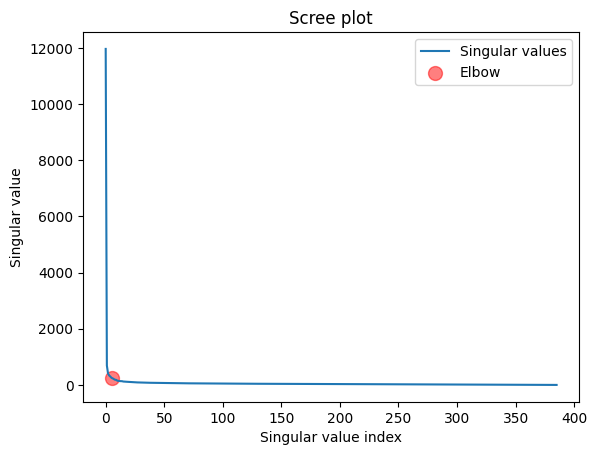

k= 5  with Screep plot
Sigma_k= 250.9209568227013
Residuals for train set:  4314.872172761188
Maximum error for train set:  81.8056017452396
Minimum error for train set:  4.238081472607291e-05
R2 for train set:  0.22504697175187627
Residuals for test set:  1430.3535335393976
Maximum error for test set:  72.85619426228541
Minimum error for test set:  0.004824564473430826
R2 for test set:  0.23999451660000515
k= 1 with cumulative percentage of variance and p= 0.99
Sigma_k= 688.74133812504
Residuals for train set:  7079.00332556767
Maximum error for train set:  86.12879856814982
Minimum error for train set:  0.00016317329874482311
R2 for train set:  -1.085853217608597
Residuals for test set:  2361.142356336503
Maximum error for test set:  86.21332456608174
Minimum error for test set:  0.0015384355101133451
R2 for test set:  -1.0709722681710114


In [146]:
#1: mixed error criterion
tol=1e-6
k=np.argmax(S/(S[0]+1)<tol)-1  #argmax returns the first occurrence of the that satisfies the condition and this is k+1
print("k=",k," with mixed error criterion and tol=",tol)
print("Sigma_k=",S[k])
U_k = U[:, :k]
Vt_k = Vt[:k, :]
S_k = np.diag(S)[:k, :k]
S_k_inv = np.linalg.inv(S_k)
theta = Vt_k.T @ S_k_inv @ U_k.T @ y_train
y_train_pred = X_train @ theta
residuals_train = y_train - y_train_pred
print("Residuals for train set: ",np.linalg.norm(residuals_train,2))
print("Maximum error for train set: ",np.max(np.abs(residuals_train)))
print("Minimum error for train set: ",np.min(np.abs(residuals_train)))
R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
print("R2 for train set: ",R2_train)

y_test_pred = X_test @ theta
residuals_test = y_test - y_test_pred
print("Residuals for test set: ",np.linalg.norm(residuals_test,2))
print("Maximum error for test set: ",np.max(np.abs(residuals_test)))
print("Minimum error for test set: ",np.min(np.abs(residuals_test)))
R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
print("R2 for test set: ",R2_test)






import matplotlib.pyplot as plt
from kneed import KneeLocator
#2: Scree Plot

k1 = KneeLocator(range(len(S)), S, curve='convex', direction='decreasing')
plt.plot(range(len(S)), S)
plt.scatter(k1.elbow, S[k1.elbow], c='red', s=100, alpha=0.5)
plt.xlabel('Singular value index')
plt.ylabel('Singular value')
plt.title('Scree plot')
plt.legend(['Singular values', 'Elbow'])
plt.show()
k=k1.elbow
print("k=",k," with Screep plot")
print("Sigma_k=",S[k])
U_k = U[:, :k]
Vt_k = Vt[:k, :]
S_k = np.diag(S)[:k, :k]
S_k_inv = np.linalg.inv(S_k)
theta = Vt_k.T @ S_k_inv @ U_k.T @ y_train
y_train_pred = X_train @ theta
residuals_train = y_train - y_train_pred
print("Residuals for train set: ",np.linalg.norm(residuals_train,2))
print("Maximum error for train set: ",np.max(np.abs(residuals_train)))
print("Minimum error for train set: ",np.min(np.abs(residuals_train)))
R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
print("R2 for train set: ",R2_train)

y_test_pred = X_test @ theta
residuals_test = y_test - y_test_pred
print("Residuals for test set: ",np.linalg.norm(residuals_test,2))
print("Maximum error for test set: ",np.max(np.abs(residuals_test)))
print("Minimum error for test set: ",np.min(np.abs(residuals_test)))
R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
print("R2 for test set: ",R2_test)


#3: Cumulative percentage of variance
p=0.99
total_sum=np.sum(S**2)
cumulative_sum=np.cumsum(S**2)
k=np.argmax((cumulative_sum/total_sum)>p)
print("k=",k,"with cumulative percentage of variance and p=",p)
print("Sigma_k=",S[k])
U_k = U[:, :k]
Vt_k = Vt[:k, :]
S_k = np.diag(S)[:k, :k]
S_k_inv = np.linalg.inv(S_k)
theta = Vt_k.T @ S_k_inv @ U_k.T @ y_train
y_train_pred = X_train @ theta
residuals_train = y_train - y_train_pred
print("Residuals for train set: ",np.linalg.norm(residuals_train,2))
print("Maximum error for train set: ",np.max(np.abs(residuals_train)))
print("Minimum error for train set: ",np.min(np.abs(residuals_train)))
R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
print("R2 for train set: ",R2_train)

y_test_pred = X_test @ theta
residuals_test = y_test - y_test_pred
print("Residuals for test set: ",np.linalg.norm(residuals_test,2))
print("Maximum error for test set: ",np.max(np.abs(residuals_test)))
print("Minimum error for test set: ",np.min(np.abs(residuals_test)))
R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
print("R2 for test set: ",R2_test)



When the value of the last singular values increas, the value of the residual also increases. This happen also for the cond number in ltsq

<h1> NOW WE CHANGE THE PERCENTAGE OF THE TRAINING SET AND THE TESTING SET </h1>

In [150]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size = .7,
    test_size = .3,
    random_state = 5,
    shuffle = True
)

rank=np.linalg.matrix_rank(X_train)
print("Rank of train data: ",rank)
print("Shape of train data: ",(X_train.T @ X_train).shape)

Rank of train data:  374
Shape of train data:  (386, 386)


Since we have no full rank, we cannot solve with normal equations

In [ ]:
print("Rank of train data: ",np.linalg.matrix_rank(X_train.T@X_train))
print("Shape of train data: ",(X_train.T @ X_train).shape)

QR

In [ ]:
import scipy.linalg as la
Q,R,P = la.qr(X_train, pivoting=True, mode='economic') #economic -> Q is m x k, R is k x n where k=min(m,n)
print("Condition number of QR factorization matrix: ",np.linalg.cond(R,2))
#truncate R and Q to rank
R_trunc = R[:rank, :rank]
Q_trunc = Q[:, :rank]
QTb = Q_trunc.T @ y_train
theta_permuted=np.zeros(X_train.shape[1])
theta_permuted [:rank]= la.solve_triangular(R_trunc, QTb) #store the solution in the first rank columns
#restore original order
theta = np.zeros_like(theta_permuted)
theta[P] = theta_permuted #permute the elements of theta_permuted to get the solution

y_train_pred = X_train @ theta
residuals_train = y_train - y_train_pred
print("Residuals for train set: ",np.linalg.norm(residuals_train,2))
print("Maximum error for train set: ",np.max(np.abs(residuals_train)))
print("Minimum error for train set: ",np.min(np.abs(residuals_train)))
R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
print("R2 for train set: ",R2_train)

y_test_pred = X_test @ theta
residuals_test = y_test - y_test_pred
print("Residuals for test set: ",np.linalg.norm(residuals_test,2))
print("Maximum error for test set: ",np.max(np.abs(residuals_test)))
print("Minimum error for test set: ",np.min(np.abs(residuals_test)))
R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
print("R2 for test set: ",R2_test)


#THIS model is quite good

SVD

In [ ]:
U, S, Vt = np.linalg.svd(X_train, full_matrices=False)
print("Rank of X_train: ",rank)
print("Number of non zero singular values: ",np.count_nonzero(S))
#S contains all singular values. If we consider only the non zero singular values, they should be equal to the rank of X_train. In this case this is not true, probably due to numerical errors.
# I will use later the PCR and Euckardt-Young theorem to remove noise


# So let's consider the first r=rank(X_train) singular values
U_r = U[:, :rank]
Vt_r = Vt[:rank, :]
S_r = np.diag(S)[:rank, :rank]
S_r_inv = np.linalg.inv(S_r)
theta = Vt_r.T @ S_r_inv @ U_r.T @ y_train
y_train_pred = X_train @ theta
residuals_train = y_train - y_train_pred
print("Residuals for train set: ",np.linalg.norm(residuals_train,2))
print("Maximum error for train set: ",np.max(np.abs(residuals_train)))
print("Minimum error for train set: ",np.min(np.abs(residuals_train)))
R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
print("R2 for train set: ",R2_train)

y_test_pred = X_test @ theta
residuals_test = y_test - y_test_pred
print("Residuals for test set: ",np.linalg.norm(residuals_test,2))
print("Maximum error for test set: ",np.max(np.abs(residuals_test)))
print("Minimum error for test set: ",np.min(np.abs(residuals_test)))
R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
print("R2 for test set: ",R2_test)


LAPACK

In [ ]:
import time
conditions=[1e-1,1e-2,1e-4,1e-8,1e-12,1e-16]
values={}
for condition in conditions:
    #gelsd
    times=[]
    for i in range(5):
        start_time = time.time()
        theta_gelsd = la.lstsq(X_train, y_train,lapack_driver='gelsd',cond=condition)[0] #we took [0] because lstsq returns a tuple
        times.append(time.time()-start_time)
    
    values['driver']='gelsd'
    values['condition']=condition
    values['AVGtime']=np.mean(times)
    y_train_pred = X_train @ theta_gelsd
    residuals_train = y_train - y_train_pred
    values['residuals_train']=np.linalg.norm(residuals_train,2)
    values['Min error residuals_train']=np.min(np.abs(residuals_train))
    values['Max error residuals_train']=np.max(np.abs(residuals_train))
    R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
    values['R2_train']=R2_train
    y_test_pred = X_test @ theta_gelsd
    residuals_test = y_test - y_test_pred
    values['residuals_test']=np.linalg.norm(residuals_test,2)
    values['Min error residuals_test']=np.min(np.abs(residuals_test))
    values['Max error residuals_test']=np.max(np.abs(residuals_test))
    R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
    values['R2_test']=R2_test
    print(values)
    #gelss
    times=[]
    for i in range(5):
        start_time = time.time()
        theta_gelss = la.lstsq(X_train, y_train,lapack_driver='gelss',cond=condition)[0] #we took [0] because lstsq returns a tuple
        times.append(time.time()-start_time)
    values['driver']='gelss'
    values['condition']=condition
    values['AVGtime']=np.mean(times)
    y_train_pred = X_train @ theta_gelss
    residuals_train = y_train - y_train_pred
    values['residuals_train']=np.linalg.norm(residuals_train,2)
    values['Min error residuals_train']=np.min(np.abs(residuals_train))
    values['Max error residuals_train']=np.max(np.abs(residuals_train))
    R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
    values['R2_train']=R2_train
    y_test_pred = X_test @ theta_gelss
    residuals_test = y_test - y_test_pred
    values['residuals_test']=np.linalg.norm(residuals_test,2)
    values['Min error residuals_test']=np.min(np.abs(residuals_test))
    values['Max error residuals_test']=np.max(np.abs(residuals_test))
    R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
    values['R2_test']=R2_test
    print(values)
    #gelsy
    times=[]
    for i in range(5):
        start_time = time.time()
        theta_gelsy = la.lstsq(X_train, y_train,lapack_driver='gelsy',cond=condition)[0] #we took [0] because lstsq returns a tuple
        times.append(time.time()-start_time)
    values['driver']='gelsy'
    values['condition']=condition
    values['AVGtime']=np.mean(times)
    y_train_pred = X_train @ theta_gelsy
    residuals_train = y_train - y_train_pred
    values['residuals_train']=np.linalg.norm(residuals_train,2)
    values['Min error residuals_train']=np.min(np.abs(residuals_train))
    values['Max error residuals_train']=np.max(np.abs(residuals_train))
    R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
    values['R2_train']=R2_train
    y_test_pred = X_test @ theta_gelsy
    residuals_test = y_test - y_test_pred
    values['residuals_test']=np.linalg.norm(residuals_test,2)
    values['Min error residuals_test']=np.min(np.abs(residuals_test))
    values['Max error residuals_test']=np.max(np.abs(residuals_test))
    R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
    values['R2_test']=R2_test
    print(values)

PCR

In [ ]:
#1: mixed error criterion
tol=1e-6
k=np.argmax(S/(S[0]+1)<tol)-1  #argmax returns the first occurrence of the that satisfies the condition and this is k+1
print("k=",k," with mixed error criterion and tol=",tol)
print("Sigma_k=",S[k])
U_k = U[:, :k]
Vt_k = Vt[:k, :]
S_k = np.diag(S)[:k, :k]
S_k_inv = np.linalg.inv(S_k)
theta = Vt_k.T @ S_k_inv @ U_k.T @ y_train
y_train_pred = X_train @ theta
residuals_train = y_train - y_train_pred
print("Residuals for train set: ",np.linalg.norm(residuals_train,2))
print("Maximum error for train set: ",np.max(np.abs(residuals_train)))
print("Minimum error for train set: ",np.min(np.abs(residuals_train)))
R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
print("R2 for train set: ",R2_train)

y_test_pred = X_test @ theta
residuals_test = y_test - y_test_pred
print("Residuals for test set: ",np.linalg.norm(residuals_test,2))
print("Maximum error for test set: ",np.max(np.abs(residuals_test)))
print("Minimum error for test set: ",np.min(np.abs(residuals_test)))
R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
print("R2 for test set: ",R2_test)






import matplotlib.pyplot as plt
from kneed import KneeLocator
#2: Scree Plot

k1 = KneeLocator(range(len(S)), S, curve='convex', direction='decreasing')
plt.plot(range(len(S)), S)
plt.scatter(k1.elbow, S[k1.elbow], c='red', s=100, alpha=0.5)
plt.xlabel('Singular value index')
plt.ylabel('Singular value')
plt.title('Scree plot')
plt.legend(['Singular values', 'Elbow'])
plt.show()
k=k1.elbow
print("k=",k," with Screep plot")
print("Sigma_k=",S[k])
U_k = U[:, :k]
Vt_k = Vt[:k, :]
S_k = np.diag(S)[:k, :k]
S_k_inv = np.linalg.inv(S_k)
theta = Vt_k.T @ S_k_inv @ U_k.T @ y_train
y_train_pred = X_train @ theta
residuals_train = y_train - y_train_pred
print("Residuals for train set: ",np.linalg.norm(residuals_train,2))
print("Maximum error for train set: ",np.max(np.abs(residuals_train)))
print("Minimum error for train set: ",np.min(np.abs(residuals_train)))
R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
print("R2 for train set: ",R2_train)

y_test_pred = X_test @ theta
residuals_test = y_test - y_test_pred
print("Residuals for test set: ",np.linalg.norm(residuals_test,2))
print("Maximum error for test set: ",np.max(np.abs(residuals_test)))
print("Minimum error for test set: ",np.min(np.abs(residuals_test)))
R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
print("R2 for test set: ",R2_test)


#3: Cumulative percentage of variance
p=0.99
total_sum=np.sum(S**2)
cumulative_sum=np.cumsum(S**2)
k=np.argmax((cumulative_sum/total_sum)>p)
print("k=",k,"with cumulative percentage of variance and p=",p)
print("Sigma_k=",S[k])
U_k = U[:, :k]
Vt_k = Vt[:k, :]
S_k = np.diag(S)[:k, :k]
S_k_inv = np.linalg.inv(S_k)
theta = Vt_k.T @ S_k_inv @ U_k.T @ y_train
y_train_pred = X_train @ theta
residuals_train = y_train - y_train_pred
print("Residuals for train set: ",np.linalg.norm(residuals_train,2))
print("Maximum error for train set: ",np.max(np.abs(residuals_train)))
print("Minimum error for train set: ",np.min(np.abs(residuals_train)))
R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
print("R2 for train set: ",R2_train)

y_test_pred = X_test @ theta
residuals_test = y_test - y_test_pred
print("Residuals for test set: ",np.linalg.norm(residuals_test,2))
print("Maximum error for test set: ",np.max(np.abs(residuals_test)))
print("Minimum error for test set: ",np.min(np.abs(residuals_test)))
R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
print("R2 for test set: ",R2_test)



<h1> Mean 0</h1>
<h4> Train set 0.9 and test set 0.1 </h4>

In [155]:
X = X - np.mean(X, axis=0)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size = .9,
    test_size = .1,
    random_state = 5,
    shuffle = True
)

rank=np.linalg.matrix_rank(X_train)
print("Rank of train data: ",rank)
print("Shape of train data: ",(X_train.shape))

Rank of train data:  374
Shape of train data:  (48150, 386)


Normal Equations

In [ ]:
print("Rank of train data: ",np.linalg.matrix_rank(X_train.T@X_train))
print("Shape of train data: ",(X_train.T @ X_train).shape)

QR

In [ ]:
import scipy.linalg as la
Q,R,P = la.qr(X_train, pivoting=True, mode='economic') #economic -> Q is m x k, R is k x n where k=min(m,n)
print("Condition number of QR factorization matrix: ",np.linalg.cond(R,2))
#truncate R and Q to rank
R_trunc = R[:rank, :rank]
Q_trunc = Q[:, :rank]
QTb = Q_trunc.T @ y_train
theta_permuted=np.zeros(X_train.shape[1])
theta_permuted [:rank]= la.solve_triangular(R_trunc, QTb) #store the solution in the first rank columns
#restore original order
theta = np.zeros_like(theta_permuted)
theta[P] = theta_permuted #permute the elements of theta_permuted to get the solution

y_train_pred = X_train @ theta
residuals_train = y_train - y_train_pred
print("Residuals for train set: ",np.linalg.norm(residuals_train,2))
print("Maximum error for train set: ",np.max(np.abs(residuals_train)))
print("Minimum error for train set: ",np.min(np.abs(residuals_train)))
R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
print("R2 for train set: ",R2_train)

y_test_pred = X_test @ theta
residuals_test = y_test - y_test_pred
print("Residuals for test set: ",np.linalg.norm(residuals_test,2))
print("Maximum error for test set: ",np.max(np.abs(residuals_test)))
print("Minimum error for test set: ",np.min(np.abs(residuals_test)))
R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
print("R2 for test set: ",R2_test)


#THIS model is quite good

SVD

In [ ]:
U, S, Vt = np.linalg.svd(X_train, full_matrices=False)
print("Rank of X_train: ",rank)
print("Number of non zero singular values: ",np.count_nonzero(S))
#S contains all singular values. If we consider only the non zero singular values, they should be equal to the rank of X_train. In this case this is not true, probably due to numerical errors.
# I will use later the PCR and Euckardt-Young theorem to remove noise


# So let's consider the first r=rank(X_train) singular values
U_r = U[:, :rank]
Vt_r = Vt[:rank, :]
S_r = np.diag(S)[:rank, :rank]
S_r_inv = np.linalg.inv(S_r)
theta = Vt_r.T @ S_r_inv @ U_r.T @ y_train
y_train_pred = X_train @ theta
residuals_train = y_train - y_train_pred
print("Residuals for train set: ",np.linalg.norm(residuals_train,2))
print("Maximum error for train set: ",np.max(np.abs(residuals_train)))
print("Minimum error for train set: ",np.min(np.abs(residuals_train)))
R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
print("R2 for train set: ",R2_train)

y_test_pred = X_test @ theta
residuals_test = y_test - y_test_pred
print("Residuals for test set: ",np.linalg.norm(residuals_test,2))
print("Maximum error for test set: ",np.max(np.abs(residuals_test)))
print("Minimum error for test set: ",np.min(np.abs(residuals_test)))
R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
print("R2 for test set: ",R2_test)


LTSQ

In [ ]:
import time
conditions=[1e-1,1e-2,1e-4,1e-8,1e-12,1e-16]
values={}
for condition in conditions:
    #gelsd
    times=[]
    for i in range(5):
        start_time = time.time()
        theta_gelsd = la.lstsq(X_train, y_train,lapack_driver='gelsd',cond=condition)[0] #we took [0] because lstsq returns a tuple
        times.append(time.time()-start_time)
    
    values['driver']='gelsd'
    values['condition']=condition
    values['AVGtime']=np.mean(times)
    y_train_pred = X_train @ theta_gelsd
    residuals_train = y_train - y_train_pred
    values['residuals_train']=np.linalg.norm(residuals_train,2)
    values['Min error residuals_train']=np.min(np.abs(residuals_train))
    values['Max error residuals_train']=np.max(np.abs(residuals_train))
    R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
    values['R2_train']=R2_train
    y_test_pred = X_test @ theta_gelsd
    residuals_test = y_test - y_test_pred
    values['residuals_test']=np.linalg.norm(residuals_test,2)
    values['Min error residuals_test']=np.min(np.abs(residuals_test))
    values['Max error residuals_test']=np.max(np.abs(residuals_test))
    R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
    values['R2_test']=R2_test
    print(values)
    #gelss
    times=[]
    for i in range(5):
        start_time = time.time()
        theta_gelss = la.lstsq(X_train, y_train,lapack_driver='gelss',cond=condition)[0] #we took [0] because lstsq returns a tuple
        times.append(time.time()-start_time)
    values['driver']='gelss'
    values['condition']=condition
    values['AVGtime']=np.mean(times)
    y_train_pred = X_train @ theta_gelss
    residuals_train = y_train - y_train_pred
    values['residuals_train']=np.linalg.norm(residuals_train,2)
    values['Min error residuals_train']=np.min(np.abs(residuals_train))
    values['Max error residuals_train']=np.max(np.abs(residuals_train))
    R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
    values['R2_train']=R2_train
    y_test_pred = X_test @ theta_gelss
    residuals_test = y_test - y_test_pred
    values['residuals_test']=np.linalg.norm(residuals_test,2)
    values['Min error residuals_test']=np.min(np.abs(residuals_test))
    values['Max error residuals_test']=np.max(np.abs(residuals_test))
    R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
    values['R2_test']=R2_test
    print(values)
    #gelsy
    times=[]
    for i in range(5):
        start_time = time.time()
        theta_gelsy = la.lstsq(X_train, y_train,lapack_driver='gelsy',cond=condition)[0] #we took [0] because lstsq returns a tuple
        times.append(time.time()-start_time)
    values['driver']='gelsy'
    values['condition']=condition
    values['AVGtime']=np.mean(times)
    y_train_pred = X_train @ theta_gelsy
    residuals_train = y_train - y_train_pred
    values['residuals_train']=np.linalg.norm(residuals_train,2)
    values['Min error residuals_train']=np.min(np.abs(residuals_train))
    values['Max error residuals_train']=np.max(np.abs(residuals_train))
    R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
    values['R2_train']=R2_train
    y_test_pred = X_test @ theta_gelsy
    residuals_test = y_test - y_test_pred
    values['residuals_test']=np.linalg.norm(residuals_test,2)
    values['Min error residuals_test']=np.min(np.abs(residuals_test))
    values['Max error residuals_test']=np.max(np.abs(residuals_test))
    R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
    values['R2_test']=R2_test
    print(values)

PCR

In [ ]:
#1: mixed error criterion
tol=1e-6
k=np.argmax(S/(S[0]+1)<tol)-1  #argmax returns the first occurrence of the that satisfies the condition and this is k+1
print("k=",k," with mixed error criterion and tol=",tol)
print("Sigma_k=",S[k])
U_k = U[:, :k]
Vt_k = Vt[:k, :]
S_k = np.diag(S)[:k, :k]
S_k_inv = np.linalg.inv(S_k)
theta = Vt_k.T @ S_k_inv @ U_k.T @ y_train
y_train_pred = X_train @ theta
residuals_train = y_train - y_train_pred
print("Residuals for train set: ",np.linalg.norm(residuals_train,2))
print("Maximum error for train set: ",np.max(np.abs(residuals_train)))
print("Minimum error for train set: ",np.min(np.abs(residuals_train)))
R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
print("R2 for train set: ",R2_train)

y_test_pred = X_test @ theta
residuals_test = y_test - y_test_pred
print("Residuals for test set: ",np.linalg.norm(residuals_test,2))
print("Maximum error for test set: ",np.max(np.abs(residuals_test)))
print("Minimum error for test set: ",np.min(np.abs(residuals_test)))
R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
print("R2 for test set: ",R2_test)






import matplotlib.pyplot as plt
from kneed import KneeLocator
#2: Scree Plot

k1 = KneeLocator(range(len(S)), S, curve='convex', direction='decreasing')
plt.plot(range(len(S)), S)
plt.scatter(k1.elbow, S[k1.elbow], c='red', s=100, alpha=0.5)
plt.xlabel('Singular value index')
plt.ylabel('Singular value')
plt.title('Scree plot')
plt.legend(['Singular values', 'Elbow'])
plt.show()
k=k1.elbow
print("k=",k," with Screep plot")
print("Sigma_k=",S[k])
U_k = U[:, :k]
Vt_k = Vt[:k, :]
S_k = np.diag(S)[:k, :k]
S_k_inv = np.linalg.inv(S_k)
theta = Vt_k.T @ S_k_inv @ U_k.T @ y_train
y_train_pred = X_train @ theta
residuals_train = y_train - y_train_pred
print("Residuals for train set: ",np.linalg.norm(residuals_train,2))
print("Maximum error for train set: ",np.max(np.abs(residuals_train)))
print("Minimum error for train set: ",np.min(np.abs(residuals_train)))
R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
print("R2 for train set: ",R2_train)

y_test_pred = X_test @ theta
residuals_test = y_test - y_test_pred
print("Residuals for test set: ",np.linalg.norm(residuals_test,2))
print("Maximum error for test set: ",np.max(np.abs(residuals_test)))
print("Minimum error for test set: ",np.min(np.abs(residuals_test)))
R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
print("R2 for test set: ",R2_test)


#3: Cumulative percentage of variance
p=0.99
total_sum=np.sum(S**2)
cumulative_sum=np.cumsum(S**2)
k=np.argmax((cumulative_sum/total_sum)>p)
print("k=",k,"with cumulative percentage of variance and p=",p)
print("Sigma_k=",S[k])
U_k = U[:, :k]
Vt_k = Vt[:k, :]
S_k = np.diag(S)[:k, :k]
S_k_inv = np.linalg.inv(S_k)
theta = Vt_k.T @ S_k_inv @ U_k.T @ y_train
y_train_pred = X_train @ theta
residuals_train = y_train - y_train_pred
print("Residuals for train set: ",np.linalg.norm(residuals_train,2))
print("Maximum error for train set: ",np.max(np.abs(residuals_train)))
print("Minimum error for train set: ",np.min(np.abs(residuals_train)))
R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
print("R2 for train set: ",R2_train)

y_test_pred = X_test @ theta
residuals_test = y_test - y_test_pred
print("Residuals for test set: ",np.linalg.norm(residuals_test,2))
print("Maximum error for test set: ",np.max(np.abs(residuals_test)))
print("Minimum error for test set: ",np.min(np.abs(residuals_test)))
R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
print("R2 for test set: ",R2_test)



CHANGE DATASET DIMENSION

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size = .9,
    test_size = .3,
    random_state = 5,
    shuffle = True
)

rank=np.linalg.matrix_rank(X_train)
print("Rank of train data: ",rank)
print("Shape of train data: ",(X_train.shape))

Normal Equations

In [ ]:
print("Rank of train data: ",np.linalg.matrix_rank(X_train.T@X_train))
print("Shape of train data: ",(X_train.T @ X_train).shape)

QR

In [ ]:
import scipy.linalg as la
Q,R,P = la.qr(X_train, pivoting=True, mode='economic') #economic -> Q is m x k, R is k x n where k=min(m,n)
print("Condition number of QR factorization matrix: ",np.linalg.cond(R,2))
#truncate R and Q to rank
R_trunc = R[:rank, :rank]
Q_trunc = Q[:, :rank]
QTb = Q_trunc.T @ y_train
theta_permuted=np.zeros(X_train.shape[1])
theta_permuted [:rank]= la.solve_triangular(R_trunc, QTb) #store the solution in the first rank columns
#restore original order
theta = np.zeros_like(theta_permuted)
theta[P] = theta_permuted #permute the elements of theta_permuted to get the solution

y_train_pred = X_train @ theta
residuals_train = y_train - y_train_pred
print("Residuals for train set: ",np.linalg.norm(residuals_train,2))
print("Maximum error for train set: ",np.max(np.abs(residuals_train)))
print("Minimum error for train set: ",np.min(np.abs(residuals_train)))
R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
print("R2 for train set: ",R2_train)

y_test_pred = X_test @ theta
residuals_test = y_test - y_test_pred
print("Residuals for test set: ",np.linalg.norm(residuals_test,2))
print("Maximum error for test set: ",np.max(np.abs(residuals_test)))
print("Minimum error for test set: ",np.min(np.abs(residuals_test)))
R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
print("R2 for test set: ",R2_test)


#THIS model is quite good

SVD

In [ ]:
U, S, Vt = np.linalg.svd(X_train, full_matrices=False)
print("Rank of X_train: ",rank)
print("Number of non zero singular values: ",np.count_nonzero(S))
#S contains all singular values. If we consider only the non zero singular values, they should be equal to the rank of X_train. In this case this is not true, probably due to numerical errors.
# I will use later the PCR and Euckardt-Young theorem to remove noise


# So let's consider the first r=rank(X_train) singular values
U_r = U[:, :rank]
Vt_r = Vt[:rank, :]
S_r = np.diag(S)[:rank, :rank]
S_r_inv = np.linalg.inv(S_r)
theta = Vt_r.T @ S_r_inv @ U_r.T @ y_train
y_train_pred = X_train @ theta
residuals_train = y_train - y_train_pred
print("Residuals for train set: ",np.linalg.norm(residuals_train,2))
print("Maximum error for train set: ",np.max(np.abs(residuals_train)))
print("Minimum error for train set: ",np.min(np.abs(residuals_train)))
R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
print("R2 for train set: ",R2_train)

y_test_pred = X_test @ theta
residuals_test = y_test - y_test_pred
print("Residuals for test set: ",np.linalg.norm(residuals_test,2))
print("Maximum error for test set: ",np.max(np.abs(residuals_test)))
print("Minimum error for test set: ",np.min(np.abs(residuals_test)))
R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
print("R2 for test set: ",R2_test)


LTSQ

In [ ]:
import time
conditions=[1e-1,1e-2,1e-4,1e-8,1e-12,1e-16]
values={}
for condition in conditions:
    #gelsd
    times=[]
    for i in range(5):
        start_time = time.time()
        theta_gelsd = la.lstsq(X_train, y_train,lapack_driver='gelsd',cond=condition)[0] #we took [0] because lstsq returns a tuple
        times.append(time.time()-start_time)
    
    values['driver']='gelsd'
    values['condition']=condition
    values['AVGtime']=np.mean(times)
    y_train_pred = X_train @ theta_gelsd
    residuals_train = y_train - y_train_pred
    values['residuals_train']=np.linalg.norm(residuals_train,2)
    values['Min error residuals_train']=np.min(np.abs(residuals_train))
    values['Max error residuals_train']=np.max(np.abs(residuals_train))
    R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
    values['R2_train']=R2_train
    y_test_pred = X_test @ theta_gelsd
    residuals_test = y_test - y_test_pred
    values['residuals_test']=np.linalg.norm(residuals_test,2)
    values['Min error residuals_test']=np.min(np.abs(residuals_test))
    values['Max error residuals_test']=np.max(np.abs(residuals_test))
    R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
    values['R2_test']=R2_test
    print(values)
    #gelss
    times=[]
    for i in range(5):
        start_time = time.time()
        theta_gelss = la.lstsq(X_train, y_train,lapack_driver='gelss',cond=condition)[0] #we took [0] because lstsq returns a tuple
        times.append(time.time()-start_time)
    values['driver']='gelss'
    values['condition']=condition
    values['AVGtime']=np.mean(times)
    y_train_pred = X_train @ theta_gelss
    residuals_train = y_train - y_train_pred
    values['residuals_train']=np.linalg.norm(residuals_train,2)
    values['Min error residuals_train']=np.min(np.abs(residuals_train))
    values['Max error residuals_train']=np.max(np.abs(residuals_train))
    R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
    values['R2_train']=R2_train
    y_test_pred = X_test @ theta_gelss
    residuals_test = y_test - y_test_pred
    values['residuals_test']=np.linalg.norm(residuals_test,2)
    values['Min error residuals_test']=np.min(np.abs(residuals_test))
    values['Max error residuals_test']=np.max(np.abs(residuals_test))
    R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
    values['R2_test']=R2_test
    print(values)
    #gelsy
    times=[]
    for i in range(5):
        start_time = time.time()
        theta_gelsy = la.lstsq(X_train, y_train,lapack_driver='gelsy',cond=condition)[0] #we took [0] because lstsq returns a tuple
        times.append(time.time()-start_time)
    values['driver']='gelsy'
    values['condition']=condition
    values['AVGtime']=np.mean(times)
    y_train_pred = X_train @ theta_gelsy
    residuals_train = y_train - y_train_pred
    values['residuals_train']=np.linalg.norm(residuals_train,2)
    values['Min error residuals_train']=np.min(np.abs(residuals_train))
    values['Max error residuals_train']=np.max(np.abs(residuals_train))
    R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
    values['R2_train']=R2_train
    y_test_pred = X_test @ theta_gelsy
    residuals_test = y_test - y_test_pred
    values['residuals_test']=np.linalg.norm(residuals_test,2)
    values['Min error residuals_test']=np.min(np.abs(residuals_test))
    values['Max error residuals_test']=np.max(np.abs(residuals_test))
    R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
    values['R2_test']=R2_test
    print(values)

PCR

In [ ]:
#1: mixed error criterion
tol=1e-6
k=np.argmax(S/(S[0]+1)<tol)-1  #argmax returns the first occurrence of the that satisfies the condition and this is k+1
print("k=",k," with mixed error criterion and tol=",tol)
print("Sigma_k=",S[k])
U_k = U[:, :k]
Vt_k = Vt[:k, :]
S_k = np.diag(S)[:k, :k]
S_k_inv = np.linalg.inv(S_k)
theta = Vt_k.T @ S_k_inv @ U_k.T @ y_train
y_train_pred = X_train @ theta
residuals_train = y_train - y_train_pred
print("Residuals for train set: ",np.linalg.norm(residuals_train,2))
print("Maximum error for train set: ",np.max(np.abs(residuals_train)))
print("Minimum error for train set: ",np.min(np.abs(residuals_train)))
R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
print("R2 for train set: ",R2_train)

y_test_pred = X_test @ theta
residuals_test = y_test - y_test_pred
print("Residuals for test set: ",np.linalg.norm(residuals_test,2))
print("Maximum error for test set: ",np.max(np.abs(residuals_test)))
print("Minimum error for test set: ",np.min(np.abs(residuals_test)))
R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
print("R2 for test set: ",R2_test)






import matplotlib.pyplot as plt
from kneed import KneeLocator
#2: Scree Plot

k1 = KneeLocator(range(len(S)), S, curve='convex', direction='decreasing')
plt.plot(range(len(S)), S)
plt.scatter(k1.elbow, S[k1.elbow], c='red', s=100, alpha=0.5)
plt.xlabel('Singular value index')
plt.ylabel('Singular value')
plt.title('Scree plot')
plt.legend(['Singular values', 'Elbow'])
plt.show()
k=k1.elbow
print("k=",k," with Screep plot")
print("Sigma_k=",S[k])
U_k = U[:, :k]
Vt_k = Vt[:k, :]
S_k = np.diag(S)[:k, :k]
S_k_inv = np.linalg.inv(S_k)
theta = Vt_k.T @ S_k_inv @ U_k.T @ y_train
y_train_pred = X_train @ theta
residuals_train = y_train - y_train_pred
print("Residuals for train set: ",np.linalg.norm(residuals_train,2))
print("Maximum error for train set: ",np.max(np.abs(residuals_train)))
print("Minimum error for train set: ",np.min(np.abs(residuals_train)))
R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
print("R2 for train set: ",R2_train)

y_test_pred = X_test @ theta
residuals_test = y_test - y_test_pred
print("Residuals for test set: ",np.linalg.norm(residuals_test,2))
print("Maximum error for test set: ",np.max(np.abs(residuals_test)))
print("Minimum error for test set: ",np.min(np.abs(residuals_test)))
R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
print("R2 for test set: ",R2_test)


#3: Cumulative percentage of variance
p=0.99
total_sum=np.sum(S**2)
cumulative_sum=np.cumsum(S**2)
k=np.argmax((cumulative_sum/total_sum)>p)
print("k=",k,"with cumulative percentage of variance and p=",p)
print("Sigma_k=",S[k])
U_k = U[:, :k]
Vt_k = Vt[:k, :]
S_k = np.diag(S)[:k, :k]
S_k_inv = np.linalg.inv(S_k)
theta = Vt_k.T @ S_k_inv @ U_k.T @ y_train
y_train_pred = X_train @ theta
residuals_train = y_train - y_train_pred
print("Residuals for train set: ",np.linalg.norm(residuals_train,2))
print("Maximum error for train set: ",np.max(np.abs(residuals_train)))
print("Minimum error for train set: ",np.min(np.abs(residuals_train)))
R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
print("R2 for train set: ",R2_train)

y_test_pred = X_test @ theta
residuals_test = y_test - y_test_pred
print("Residuals for test set: ",np.linalg.norm(residuals_test,2))
print("Maximum error for test set: ",np.max(np.abs(residuals_test)))
print("Minimum error for test set: ",np.min(np.abs(residuals_test)))
R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
print("R2 for test set: ",R2_test)

